# Second Order finite difference scheme for two point Boundary value Problem


Given equation : 
$$
-U''(x) = f(x), \qquad x \in (0,1)
$$

Subject to the conditions : 
$$
U(0) = a = 0,  \qquad U'(1) = b = 1
$$

We will define a uniform grid of $n+1$ points from $x_{0} = 0$ to $x_{n+1} = 1$ with spacing
$$
h = \frac{1}{n+1}
$$
and
$$
x_j = j h, \qquad 0 \le j \le n+1
$$



Let the numerical solution 

$$
U_{j} \approx U(x_{j})
$$

## Scheme S1

Approximate $U''$ using second order central difference

\begin{eqnarray*}
U_0 &=& a \\
- \frac{U_{j-1} - 2U_{j} + U_{j+1}}{h^{2}} &=& f_j, \qquad 1 \le j \le n \\
\frac{U_{n+1} - U_{n}}{h} &=& b
\end{eqnarray*}

The boundary condition at $x=1$ is only first order accurate because

$$
\frac{U(x_{n+1}) - U(x_n)}{h} = U'(x_{n+1}) + O(h)
$$

Eliminating $U_0$, we get
\begin{eqnarray*}
- \frac{ - 2U_{1} + U_{2}}{h^{2}} &=& f_1 + \frac{a}{h^2}\\
- \frac{U_{j-1} - 2U_{j} + U_{j+1}}{h^{2}} &=& f_j, \qquad 2 \le j \le n \\
\frac{U_{n+1} - U_{n}}{h^2} &=& \frac{b}{h}
\end{eqnarray*}

In matrix form, we have

$$
\frac{1}{h^2}
\begin{bmatrix} 
2 & -1 & 0 & 0 \\ 
-1 & 2 & -1 & 0 \\ 
0 & -1 & 2 & -1 \\ 
0 & 0 & -1 & 1 \end{bmatrix}
\begin{bmatrix}
U_1 \\
U_2 \\
\vdots \\
U_n \\
U_{n+1} \end{bmatrix} = 
\begin{bmatrix}
f_1 + \frac{a}{h^2} \\
f_2 \\
\vdots \\
f_{n} \\
\frac{b}{h} \end{bmatrix}
$$

## Scheme S2

Introduce an artificial/ghost point $x_{n+2}$ and use central difference

\begin{eqnarray*}
U_0 &=& a \\
- \frac{U_{j-1} - 2U_{j} + U_{j+1}}{h^{2}} &=& f_j, \qquad 1 \le j \le n+1 \\
\frac{U_{n+2} - U_{n}}{2h} &=& b
\end{eqnarray*}

We want to eliminate $U_{n+2}$

\begin{eqnarray*}
- \frac{ - 2U_{1} + U_{2}}{h^{2}} &=& f_1 + \frac{a}{h^2}\\
- \frac{U_{j-1} - 2U_{j} + U_{j+1}}{h^{2}} &=& f_j, \qquad 2 \le j \le n \\
- \frac{U_{n} - 2U_{n+1} + U_{n+2}}{h^{2}} &=& f_{n+1} \\
\frac{U_{n+2} - U_{n}}{2h} &=& b
\end{eqnarray*}

which leads to

\begin{eqnarray*}
- \frac{ - 2U_{1} + U_{2}}{h^{2}} &=& f_1 + \frac{a}{h^2}\\
- \frac{U_{j-1} - 2U_{j} + U_{j+1}}{h^{2}} &=& f_j, \qquad 2 \le j \le n \\
\frac{U_{n+1} - U_{n}}{h^{2}} &=& \frac{1}{2} f_{n+1} + \frac{b}{h}
\end{eqnarray*}

We have the same matrix on the left, but the right hand side vector has an extra term in the last entry.

We can similarly define these matrices for different values of n.

Here, we will implement a function solve() in which inputs will be n and scheme and output will be X(i.e. vector for grid points) and v(vector for approximated values of function u).

We will plot the approximated values and original function u on graph and then calculate the error for different values of n and plot them.

Finally, we will find the convergence matrix that shows how fast the approximated values are converging towards original function values with respect to n.





In [7]:
#importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [8]:
xmin, xmax = 0.0, 1.0 # domain
a = 0.0 # left dirichlet boundary
b = 1.0 # right neumann boundary

def solve(n, scheme):
    h = (xmax - xmin)/(n+1)
    A = np.zeros((n,n))     #coefficient matrix
    A[0,0] = 2.0            
    A[0,1] = -1.0
    A[n-1,n-2] = -1.0
    A[n-1,n-1] = 1.0
    for i in range(1,n-1):
        A[i,i-1] = -1.0
        A[i,i] = 2.0
        A[i,i+1] = -1.0  
    
    X = np.linspace(xmin+h, xmax-h, n)      #X array
    F = -np.exp(X-1)                       #array for f(X) = -e^(X-1)
    b = h**2 * F                           #b array for right hand side
    if scheme == 'S1':
        b[n-1] = b[n-1] + h                #last entry change due to condition given in S1
    else:    
        b[n-1] = b[n-1] + h + (((h**2)/2) * (-1))    #last entry change due to condition given in S2
                                                    
    y = np.linalg.solve(A,b)                         #solving linear equations formed by above matrices defined
    return(X,y)

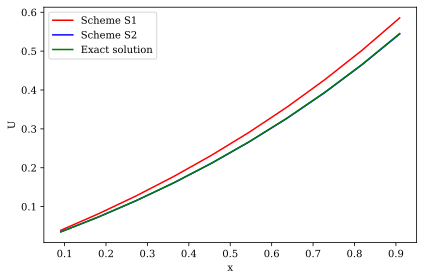

In [10]:
x1,u1 = solve(n = 10 , scheme = 'S1')       #function call for solving linear equations
x2, u2 = solve(n = 10, scheme = 'S2')
Uex = (1/np.e)* (np.exp(x1)-1)                    # exact function array
plt.plot(x1,u1, color='r', label = 'Scheme S1')
plt.plot(x2,u2,color = 'b', label = 'Scheme S2')
plt.plot(x1,Uex, color = 'g', label = 'Exact solution')
plt.xlabel('x')
plt.ylabel('U')
plt.legend()
plt.show()

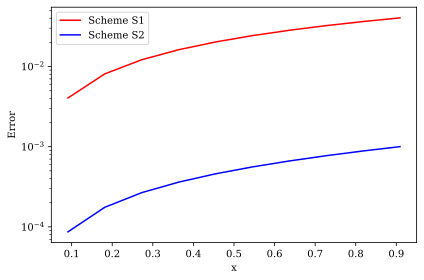

In [12]:
plt.semilogy(x1,np.abs(u1-Uex), color='r', label = 'Scheme S1')
plt.semilogy(x2,np.abs(u2-Uex),color = 'b', label = 'Scheme S2')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.show()

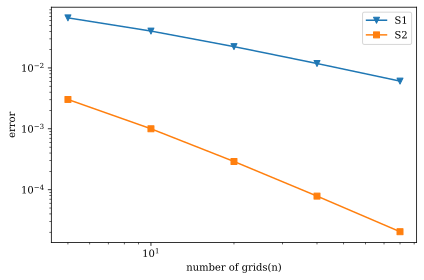

In [15]:
#for finding error
n = 5  #setting initial value of number of grids
iterations = 5
max_error_1 = []
max_error_2 = []
grids = []
step_size = []
for i in range(iterations):
    x1,u1 = solve(n, scheme = 'S1')
    x2,u2 = solve(n, scheme = 'S2')
    Uorig = (1/np.e)* (np.exp(x1)-1)
    max_error_1.append(np.max(abs(Uorig-u1)))
    max_error_2.append(np.max(abs(Uorig-u2)))
    grids.append(n)
    step_size.append(x1[1]-x1[0])
    n *= 2                    #doubling the value of grids in each iteration upto n=80
plt.xlabel('number of grids(n)')
plt.ylabel('error')
plt.loglog(grids,max_error_1,'-v', label = 'S1')
plt.loglog(grids,max_error_2,'-s', label = 'S2')
plt.legend()


In [17]:
#for finding rate of convergence
a = len(step_size)
conv1 = []
conv2 = []  #array for rate of convergence        
for i in range(a-1):
    conv1.append((np.log(max_error_1[i]/max_error_1[i+1]))/(np.log(step_size[i]/step_size[i+1])))
    conv2.append((np.log(max_error_2[i]/max_error_2[i+1]))/(np.log(step_size[i]/step_size[i+1])))
print('S1 rate:', conv1)
print('S2 rate:', conv2)

S1 rate: [0.8232081426674792, 0.9100679241772339, 0.9545983550580235, 0.9771827425336375]
S2 rate: [1.8290997174287313, 1.9132062127927274, 1.956221370838158, 1.978008557559947]


This implies that Scheme S2 converges towards original function at a higher rate than Scheme S1 with respect to n(number of grid points) and hence Scheme S2 is a better approximation to original function than scheme S1.